# Cross-sectional model

In [34]:
import matplotlib.pyplot as plt
import numpy as np

import timml as tml

plt.rcParams["figure.figsize"] = (4, 3)
plt.rcParams["figure.autolayout"] = True

## Two-layer model with head-specified line-sink
Two-layer aquifer bounded on top by a semi-confined layer. Head above the semi-confining layer is 5. Head line-sink located at $x=0$ with head equal to 2, cutting through layer 0 only.

Number of elements, Number of equations: 2 , 1
..
solution complete


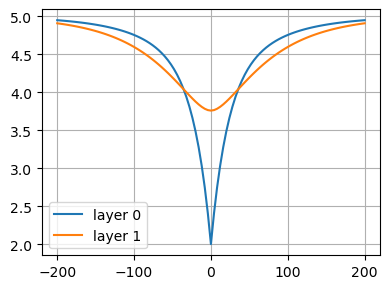

In [35]:
ml = tml.ModelMaq(
    kaq=[1, 2], z=[4, 3, 2, 1, 0], c=[1000, 1000], topboundary="semi", hstar=5
)
ls = tml.HeadLineSink1D(ml, xls=0, hls=2, layers=0)
ml.solve()

x = np.linspace(-200, 200, 101)
h = ml.headalongline(x, np.zeros_like(x))
plt.plot(x, h[0], label="layer 0")
plt.plot(x, h[1], label="layer 1")
plt.legend(loc="best")
plt.grid()

## 1D inhomogeneity

Three strips with semi-confined conditions on top of all three

In [36]:
ml = tml.ModelXsection(naq=2)
tml.XsectionMaq(
    ml,
    x1=-np.inf,
    x2=-50,
    kaq=[1, 2],
    z=[4, 3, 2, 1, 0],
    c=[1000, 1000],
    npor=0.3,
    topboundary="semi",
    hstar=5,
)
tml.XsectionMaq(
    ml,
    x1=-50,
    x2=50,
    kaq=[1, 2],
    z=[4, 3, 2, 1, 0],
    c=[1000, 1000],
    npor=0.3,
    topboundary="semi",
    hstar=4.5,
)
tml.XsectionMaq(
    ml,
    x1=50,
    x2=np.inf,
    kaq=[1, 2],
    z=[4, 3, 2, 1, 0],
    c=[1000, 1000],
    npor=0.3,
    topboundary="semi",
    hstar=4,
)
ml.solve()

Number of elements, Number of equations: 7 , 8
.......
solution complete


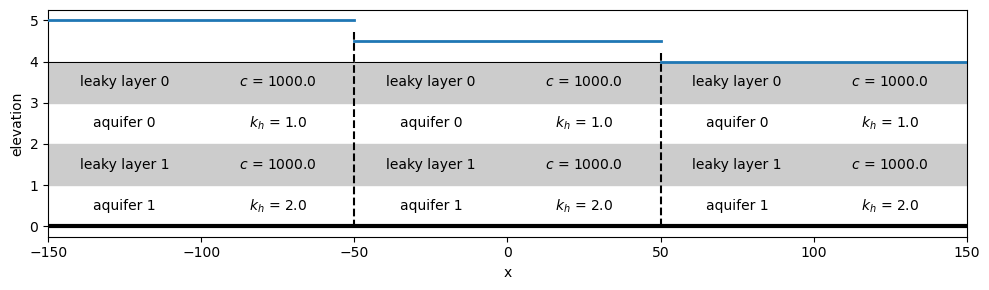

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ml.plots.xsection(xy=[(-150, 0), (150, 0)], ax=ax, params=True);

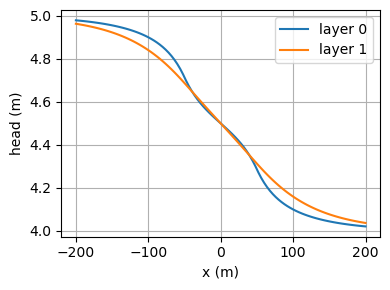

In [38]:
x = np.linspace(-200, 200, 101)
h = ml.headalongline(x, np.zeros(101))
plt.plot(x, h[0], label="layer 0")
plt.plot(x, h[1], label="layer 1")
plt.xlabel("x (m)")
plt.ylabel("head (m)")
plt.legend(loc="best")
plt.grid()

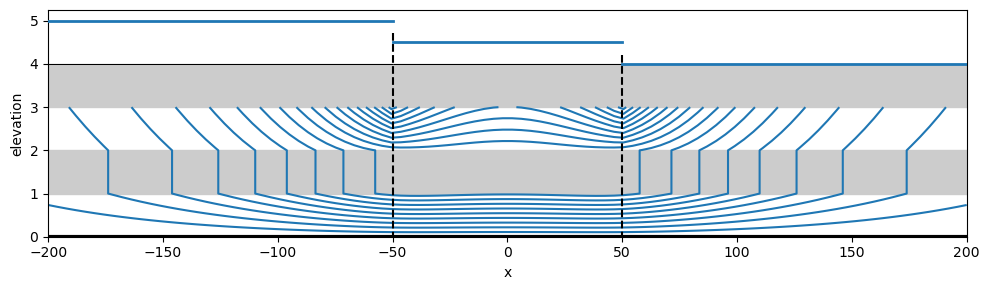

In [39]:
ml.plots.vcontoursf1D(x1=-200, x2=200, nx=100, levels=20, color="C0", figsize=(10, 3));

Three strips with semi-confined conditions at the top of the strip in the middle only. The head is specified in the strip on the left and in the strip on the right.

Number of elements, Number of equations: 7 , 10
.......
solution complete


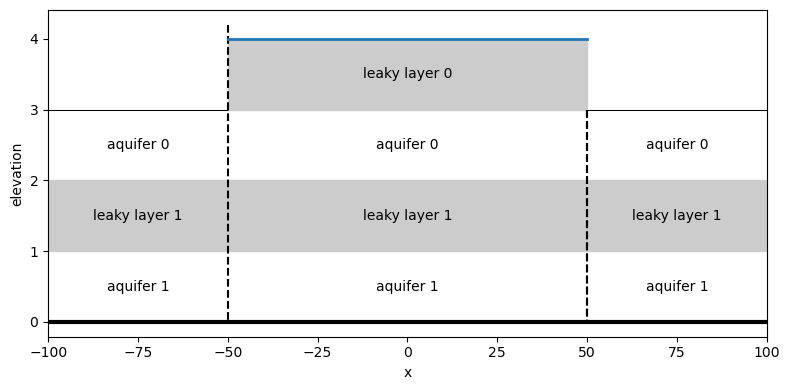

In [40]:
ml = tml.ModelXsection(naq=2)
tml.XsectionMaq(
    ml,
    x1=-np.inf,
    x2=-50,
    kaq=[1, 2],
    z=[3, 2, 1, 0],
    c=[1000],
    npor=0.3,
    topboundary="conf",
)
tml.XsectionMaq(
    ml,
    x1=-50,
    x2=50,
    kaq=[1, 2],
    z=[4, 3, 2, 1, 0],
    c=[1000, 1000],
    npor=0.3,
    topboundary="semi",
    hstar=4,
)
tml.XsectionMaq(
    ml,
    x1=50,
    x2=np.inf,
    kaq=[1, 2],
    z=[3, 2, 1, 0],
    c=[1000],
    npor=0.3,
    topboundary="conf",
)
rf1 = tml.Constant(ml, -100, 0, 5)
rf2 = tml.Constant(ml, 100, 0, 5)

ml.solve()

ml.plots.xsection(xy=[(-100, 0), (100, 0)]);

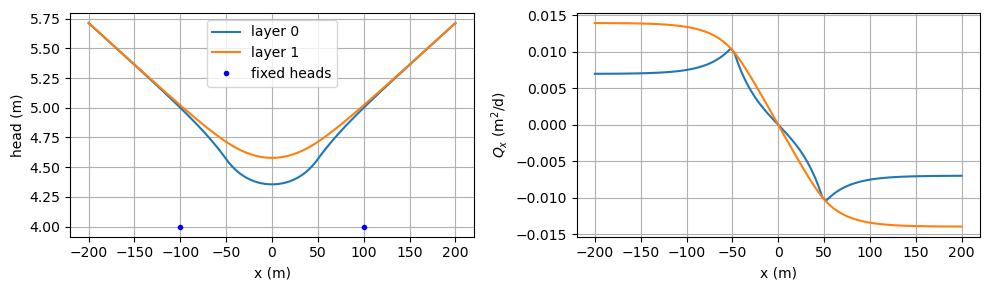

In [41]:
x = np.linspace(-200, 200, 101)
h = ml.headalongline(x, np.zeros_like(x))
Qx, _ = ml.disvecalongline(x, np.zeros_like(x))

plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(x, h[0], label="layer 0")
plt.plot(x, h[1], label="layer 1")
plt.plot([-100, 100], [4, 4], "b.", label="fixed heads")
plt.xlabel("x (m)")
plt.ylabel("head (m)")
plt.legend(loc="best")
plt.grid()
plt.subplot(122)
plt.plot(x, Qx[0], label="layer 0")
plt.plot(x, Qx[1], label="layer 1")
plt.xlabel("x (m)")
plt.ylabel("$Q_x$ (m$^2$/d)")
plt.grid()

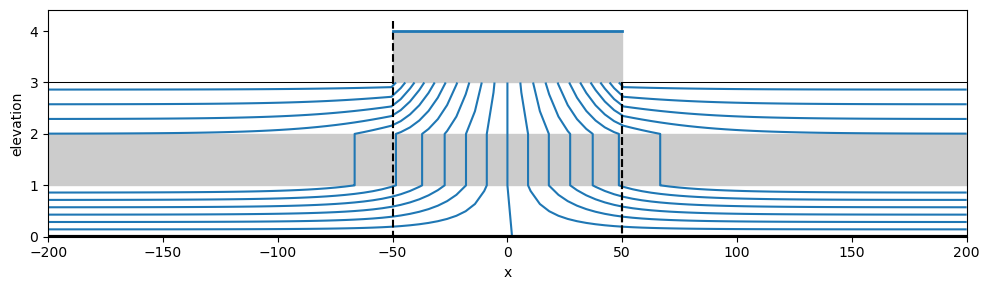

In [42]:
ml.plots.vcontoursf1D(x1=-200, x2=200, nx=100, levels=20, color="C0", figsize=(10, 3));

## Impermeable wall

Flow from left to right in three-layer aquifer with impermeable wall in bottom 2 layers

In [43]:
# need ModelMaq here since Uflow requires a confined background aquifer
ml = tml.ModelMaq(kaq=[1, 2, 4], z=[5, 4, 3, 2, 1, 0], c=[5000, 1000])
uf = tml.Uflow(ml, 0.002, 0)
rf = tml.Constant(ml, 100, 0, 20)
ld1 = tml.ImpLineDoublet1D(ml, xld=0, layers=[0, 1])

ml.solve()

Number of elements, Number of equations: 3 , 3
...
solution complete


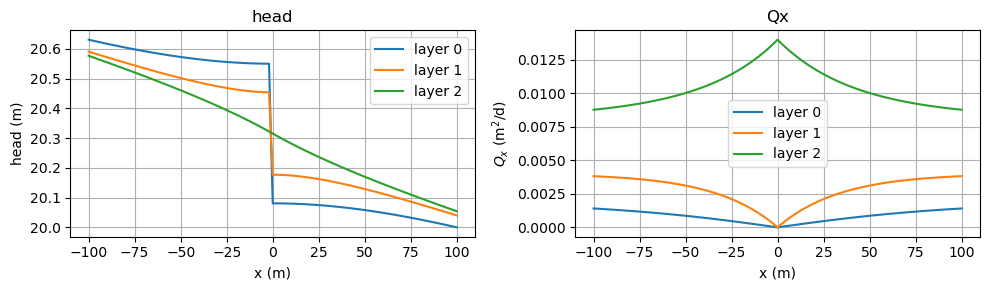

In [44]:
x = np.linspace(-100, 100, 101)
h = ml.headalongline(x, np.zeros_like(x))
Qx, _ = ml.disvecalongline(x, np.zeros_like(x))

plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.title("head")
plt.plot(x, h[0], label="layer 0")
plt.plot(x, h[1], label="layer 1")
plt.plot(x, h[2], label="layer 2")
plt.xlabel("x (m)")
plt.ylabel("head (m)")
plt.legend(loc="best")
plt.grid()
plt.subplot(122)
plt.title("Qx")
plt.plot(x, Qx[0], label="layer 0")
plt.plot(x, Qx[1], label="layer 1")
plt.plot(x, Qx[2], label="layer 2")
plt.xlabel("x (m)")
plt.ylabel("$Q_x$ (m$^2$/d)")
plt.legend(loc="best")
plt.grid()

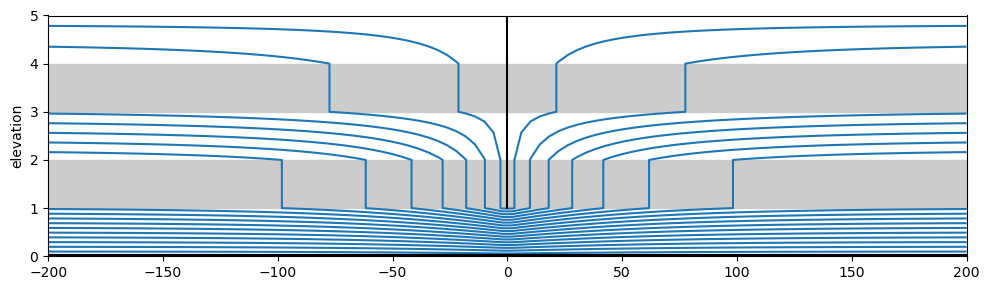

In [45]:
ml.plots.vcontoursf1D(x1=-200, x2=200, nx=100, levels=20, color="C0", figsize=(10, 3))
plt.plot([0, 0], [5, 1], "k");  # plot wall

## Infiltration

Comparing solution with `Xsection` inhomogeneities to `XsectionAreaSink` solution.

Number of elements, Number of equations: 7 , 10
.......
solution complete


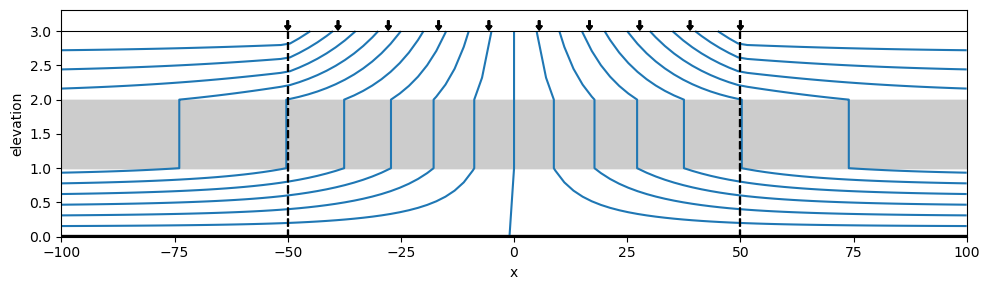

In [46]:
ml = tml.ModelXsection(naq=2)
tml.XsectionMaq(
    ml,
    x1=-np.inf,
    x2=-50,
    kaq=[1, 2],
    z=[3, 2, 1, 0],
    c=[1000],
    npor=0.3,
    topboundary="conf",
)
tml.XsectionMaq(
    ml,
    x1=-50,
    x2=50,
    kaq=[1, 2],
    z=[3, 2, 1, 0],
    c=[1000],
    npor=0.3,
    topboundary="conf",
    N=0.001,
)
tml.XsectionMaq(
    ml,
    x1=50,
    x2=np.inf,
    kaq=[1, 2],
    z=[3, 2, 1, 0],
    c=[1000],
    npor=0.3,
    topboundary="conf",
)
tml.Constant(ml, -100, 0, 10)
tml.Constant(ml, 100, 0, 10)
ml.solve()

fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ml.plots.xsection(xy=[(-100, 0), (100, 0)], labels=False, ax=ax)
ml.plots.vcontoursf1D(
    x1=-100, x2=100, nx=100, levels=20, newfig=False, ax=ax, color="C0"
);

Number of elements, Number of equations: 2 , 1
..
solution complete


/var/folders/ky/8r_kg9w91ld3b898xn53q9wm0000gn/T/ipykernel_10180/957442064.py:2: DeprecationWarning: XsectionAreaSink is only for testing purposes. It is recommended to add infiltration through XsectionMaq or Xsection3D and specifing 'N'.
  tml.XsectionAreaSink(ml2, -50, 50, 0.001)


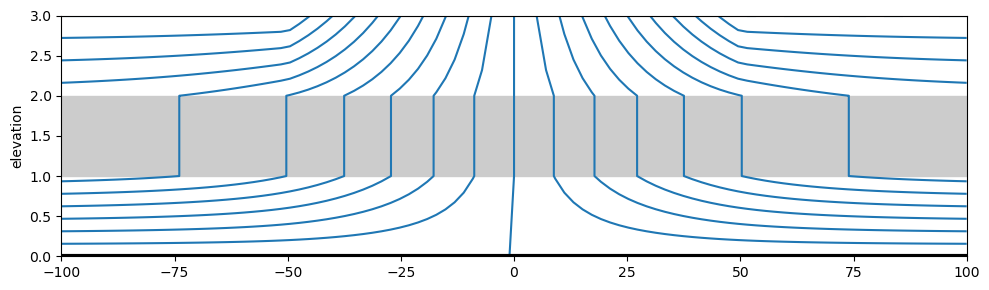

In [47]:
ml2 = tml.ModelMaq(kaq=[1, 2], z=[3, 2, 1, 0], c=[1000], topboundary="conf")
tml.XsectionAreaSink(ml2, -50, 50, 0.001)
tml.Constant(ml2, -100, 0, 10)
ml2.solve()
ml2.plots.vcontoursf1D(x1=-100, x2=100, nx=100, levels=20, color="C0", figsize=(10, 3));

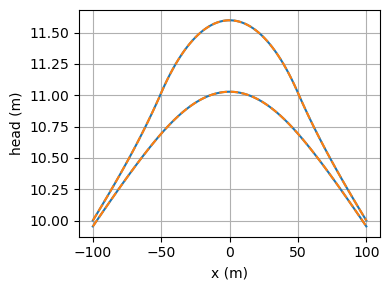

In [48]:
x = np.linspace(-100, 100, 100)
plt.plot(x, ml.headalongline(x, 0)[0], "C0")
plt.plot(x, ml.headalongline(x, 0)[1], "C0")
plt.plot(x, ml2.headalongline(x, 0)[0], "--C1")
plt.plot(x, ml2.headalongline(x, 0)[1], "--C1")
plt.xlabel("x (m)")
plt.ylabel("head (m)")
plt.grid()

Number of elements, Number of equations: 7 , 202
.......
solution complete


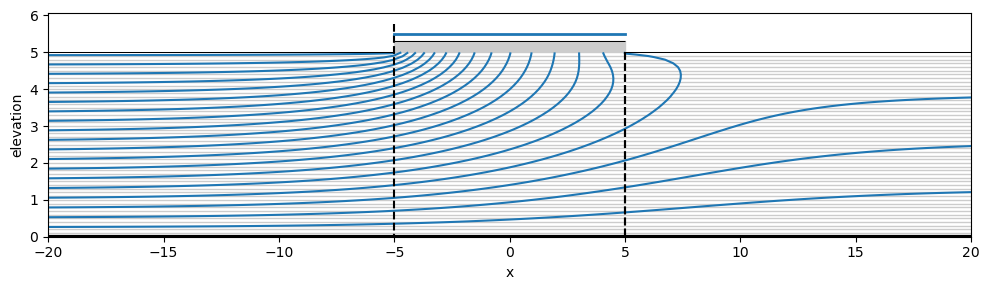

In [49]:
ml = tml.ModelXsection(naq=50)
tml.Xsection3D(ml, x1=-np.inf, x2=-5, kaq=1, z=np.arange(5, -0.1, -0.1), kzoverkh=0.1)
tml.Xsection3D(
    ml,
    x1=-5,
    x2=5,
    kaq=1,
    z=np.arange(5, -0.1, -0.1),
    kzoverkh=0.1,
    topboundary="semi",
    hstar=5.5,
    topres=3,
    topthick=0.3,
)
tml.Xsection3D(ml, x1=5, x2=np.inf, kaq=1, z=np.arange(5, -0.1, -0.1), kzoverkh=0.1)
rf1 = tml.Constant(ml, -100, 0, 5.7)
rf2 = tml.Constant(ml, 100, 0, 5.47)

ml.solve()

ml.plots.vcontoursf1D(x1=-20, x2=20, nx=100, levels=20, color="C0", figsize=(10, 3));

Number of elements, Number of equations: 7 , 22
.......
solution complete


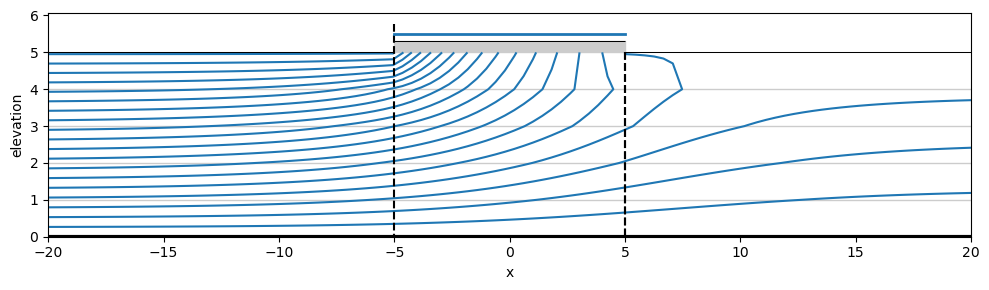

In [50]:
ml = tml.ModelXsection(naq=5)
tml.Xsection3D(ml, x1=-np.inf, x2=-5, kaq=1, z=np.arange(5, -0.1, -1), kzoverkh=0.1)
tml.Xsection3D(
    ml,
    x1=-5,
    x2=5,
    kaq=1,
    z=np.arange(5, -0.1, -1),
    kzoverkh=0.1,
    topboundary="semi",
    hstar=5.5,
    topres=3,
    topthick=0.3,
)
tml.Xsection3D(ml, x1=5, x2=np.inf, kaq=1, z=np.arange(5, -0.1, -1), kzoverkh=0.1)
rf1 = tml.Constant(ml, -100, 0, 5.7)
rf2 = tml.Constant(ml, 100, 0, 5.47)

ml.solve()

ml.plots.vcontoursf1D(x1=-20, x2=20, nx=100, levels=20, color="C0", figsize=(10, 3));

In [51]:
ml = tml.ModelXsection(naq=2)
tml.XsectionMaq(
    ml,
    x1=-np.inf,
    x2=-50,
    kaq=[1, 2],
    z=[4, 3, 2, 1, 0],
    c=[1000, 1000],
    npor=0.3,
    topboundary="semi",
    hstar=15,
)
tml.XsectionMaq(
    ml,
    x1=-50,
    x2=50,
    kaq=[1, 2],
    z=[4, 3, 2, 1, 0],
    c=[1000, 1000],
    npor=0.3,
    topboundary="semi",
    hstar=13,
)
tml.XsectionMaq(
    ml,
    x1=50,
    x2=np.inf,
    kaq=[1, 2],
    z=[4, 3, 2, 1, 0],
    c=[1000, 1000],
    npor=0.3,
    topboundary="semi",
    hstar=11,
)
ml.solve()

Number of elements, Number of equations: 7 , 8
.......
solution complete


In [52]:
from timml.linesink1d import FluxDiffLineSink1D, HeadDiffLineSink1D

Number of elements, Number of equations: 2 , 2
..
solution complete


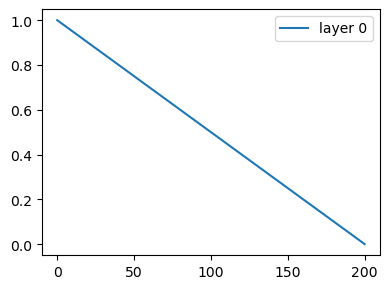

In [53]:
ml = tml.ModelMaq(kaq=[10], z=[0, -10], topboundary="conf")
ls = tml.HeadLineSink1D(ml, xls=0, hls=1, wh="H", layers=0)
ls = tml.HeadLineSink1D(ml, xls=200, hls=0, wh="H", layers=0)
hd = HeadDiffLineSink1D(ml, xls=100)
fd = FluxDiffLineSink1D(ml, xls=100)
ml.solve()

x = np.linspace(0, 200, 101)
h = ml.headalongline(x, np.zeros_like(x))
plt.plot(x, h[0], label="layer 0")
# plt.plot(x, h[1], label="layer 1")
plt.legend(loc="best")